In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import RFECV, SelectKBest, mutual_info_classif
import scipy.stats as stats
from imblearn.over_sampling import SMOTE
from scipy.stats import skew, probplot
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_predict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    roc_curve, auc, confusion_matrix
)



In [60]:
df = pd.read_csv('diabetes.csv')
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [61]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [62]:
df.shape

(768, 9)

In [63]:
null_data = df.isnull()
null_data.sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [64]:
#Since we dont have any missing values,we dont need to handle them

In [65]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [66]:
# SInce we dont have any categorical features,we dont need to handle them

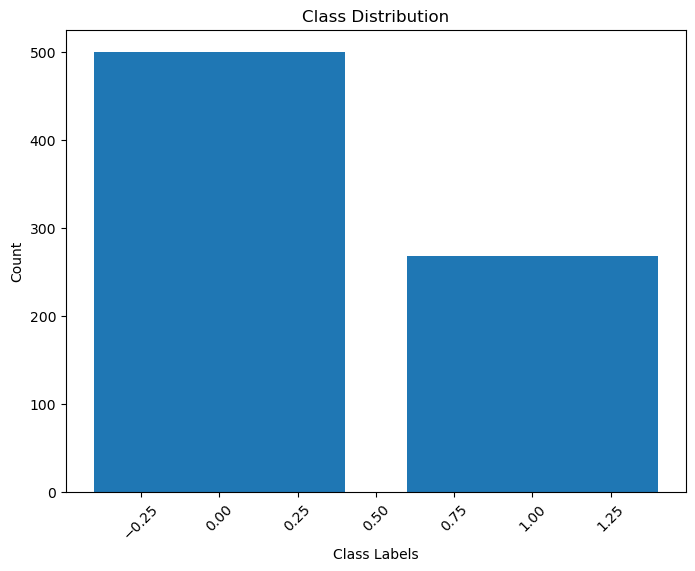

Class Balance (%):
Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64


In [67]:
#Checking for imbalance in the data by computing class balance%
class_counts = df['Outcome'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()


class_balance = class_counts / class_counts.sum() * 100
print("Class Balance (%):")
print(class_balance)


In [68]:
# There is class imbalance in the data as Outcome = 1 is the minority class at 34.89% of the values.We will use SMOTE oversampling technique later(given minority class is of more concern to us) to generate synthetic samples for the minority class to address the same

In [69]:
# Separating the independent and dependent features 
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Splitting the dataset into training and test data for independent and dependent variables respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

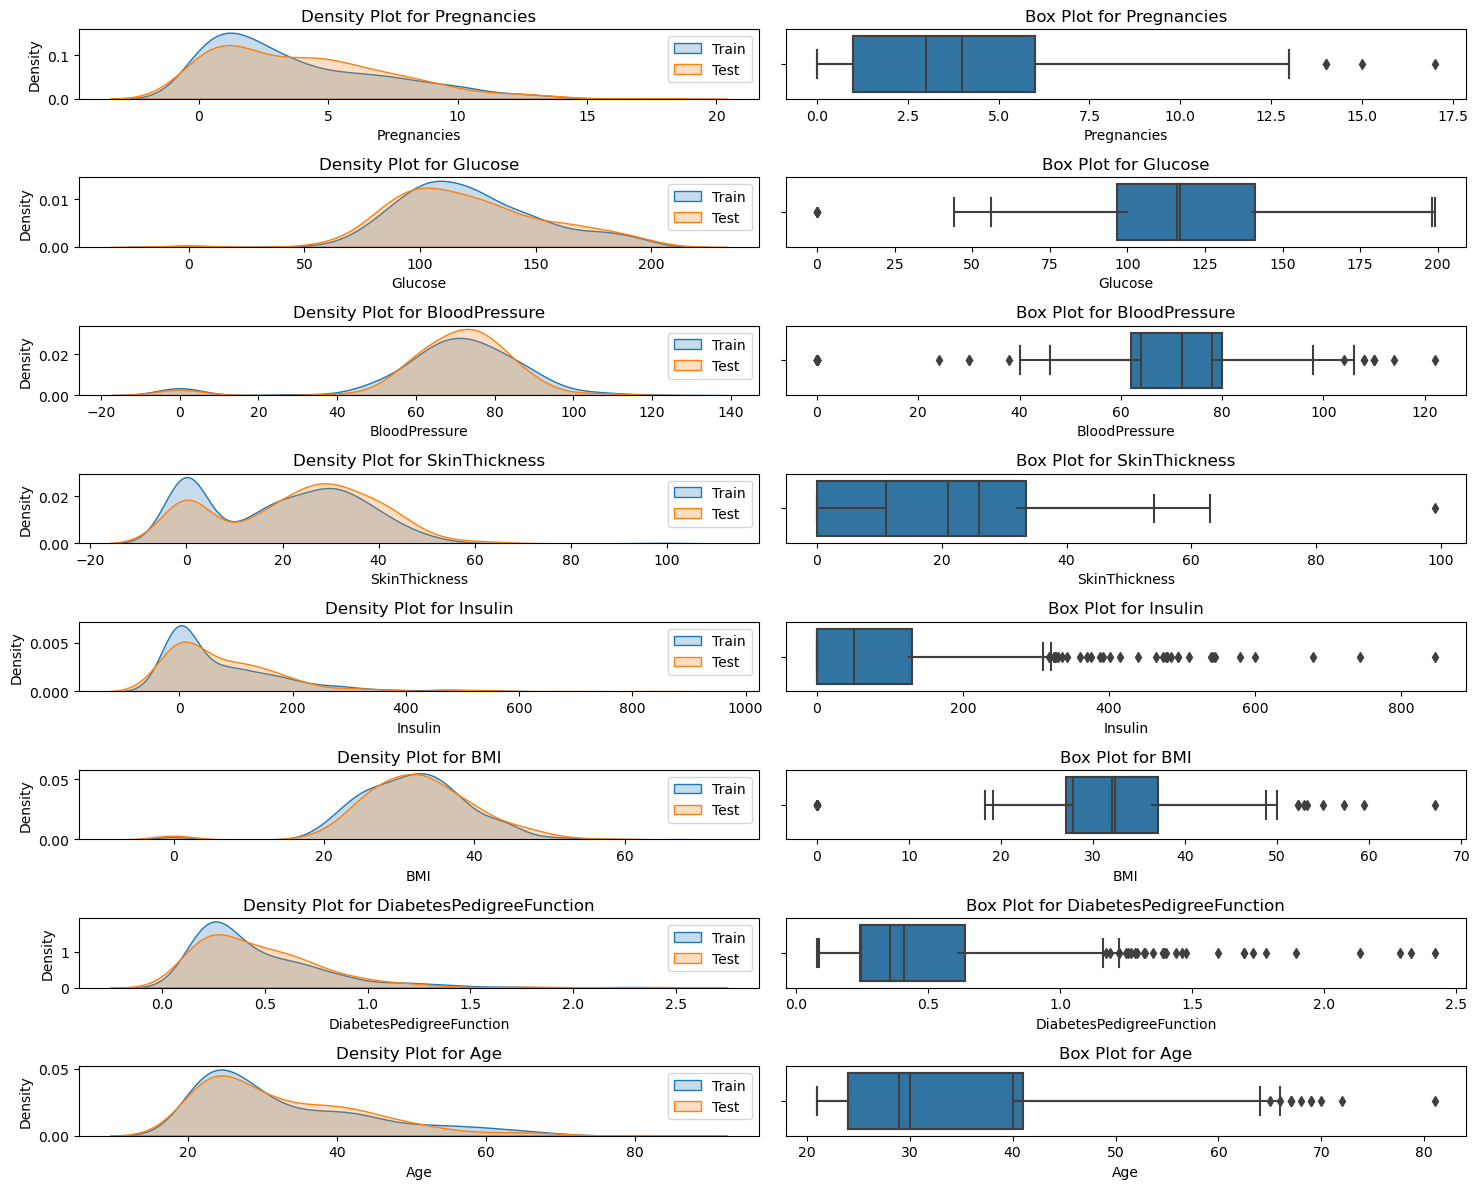

In [70]:
# Plotting Densityplots and Boxplots of training and test data for all the features for data exploration 
features = X.columns

fig, axes = plt.subplots(nrows=len(features), ncols=2, figsize=(15, 12))

for i, feature in enumerate(features):
    
    sns.kdeplot(X_train[feature], ax=axes[i, 0], label='Train', fill=True)
    axes[i, 0].set_title(f'Density Plot for {feature} (Train)')

    
    sns.boxplot(x=X_train[feature], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot for {feature} (Train)')

    
    sns.kdeplot(X_test[feature], ax=axes[i, 0], label='Test', fill=True)
    axes[i, 0].legend()
    axes[i, 0].set_title(f'Density Plot for {feature}')

    
    sns.boxplot(x=X_test[feature], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot for {feature}')

plt.tight_layout()
plt.show()

In [ ]:
# Observation_1(from the kdeplot)
# Postive skewness in the columsn (Pregnancies,Insulin,Glucose,DiabetesPedigreeFunction,Age)


# Observation_2(from the kdeplot)
# The level of skewness is relatively consistent between both training and test sets indicating data consistency

In [ ]:
# Observation_1(from the boxplot)
# Outlier presence in all the columns

# Observation_2(from the boxplot)
# Greater relative variability(spread) in the columns(Pregnancies,Glucose,Age)

In [13]:
# Given our limited domain knowledge in the healthcare sector,we can conclude that

# Risk factors of diabetes are

# High Blood Pressure
# High BMI
# High Insulin
# High Age
# High Pregnancies
# High DiabetesPedigreeFunction
# High Glucose
# High SkinThickness

#Consequently we will classify these outliers as relevant to the context and will not proceed with any further treatment on them such as imputation or winsorization 

In [71]:
# Replacing the lower end outliers with median for both training and test dataset on the selected features

def replace_median_iqr(train_data, test_data, features):
    
    for feature in features:
        Q1 = train_data[feature].quantile(0.25)
        Q3 = train_data[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        

        train_data[feature] = np.where(train_data[feature] < lower_bound,
                                       train_data[feature].median(), train_data[feature])

        test_data[feature] = np.where(test_data[feature] < lower_bound,
                                     test_data[feature].median(), test_data[feature])

    return train_data, test_data

selected_features = ['BloodPressure','Insulin','SkinThickness','Glucose']
train_data_processed, test_data_processed = replace_median_iqr(X_train, X_test, selected_features)

X_train = train_data_processed
X_test = test_data_processed


In [52]:
# Instantiating a smote object 
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Applying SMOTE to balance the class distribution in the training data
X_train, y_train = smote.fit_resample(X_train, y_train)

In [53]:
#Implementing Feature Scaling on test and training set

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [72]:
# Transforming the features in both the training and test datasets using polynomial features of degree 2
# This creates new features that capture interactions and higher-order relationships between the original features
# In a linear model relationships are typically assumed to be linear but many real-world relationships are not strictly linear

poly = PolynomialFeatures(degree=2)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test) 


In [55]:
results_train = {}
results_test = {}

roc_auc_train = {}
roc_auc_test = {}

# Instantiating the models
models = {
    'Logistic Regression': LogisticRegression(max_iter = 1000,solver='liblinear'),
    'KNN Classifier': KNeighborsClassifier(),
    'SVM Classifier': SVC(probability=True),  
    'Naive Bayes': GaussianNB()  
}

# Hyperparameter Search Space for respective models

# 'C': Regularization strength, controls the inverse of regularization strength. Smaller values specify stronger regularization, while larger values reduce regularization. It helps prevent overfitting
# 'n_neighbors': The number of neighbors to consider when making predictions. It affects the model's sensitivity to local patterns in the data. Smaller values make the model more sensitive (lower bias, higher variance), while larger values make it less sensitive (higher bias, lower variance).
# 'C': Regularization parameter, similar to Logistic Regression. It balances the trade-off between maximizing the margin and minimizing the classification error. Smaller 'C' values lead to a wider margin but may allow some misclassification, while larger 'C' values narrow the margin
# 'kernel': The kernel function to be used in the SVM. It determines the mapping of data into a higher-dimensional space, where linear separation might be possible 'linear' uses a linear kernel, while 'rbf' uses a radial basis function (Gaussian) kernel.

param_grids = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1.0, 10.0]},
    'KNN Classifier': {'n_neighbors': [1, 3, 5, 7, 9]},
    'SVM Classifier': {'C': [0.001, 0.01, 0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']}
}

# Feature selection methods for each model

# Recursive Feature Elimination with Cross-Validation (RFECV)
# using 5 fold Stratified Cross-Validation

# SelectKBest feature selection using Mutual Information (mutual_info_classif)
# with k set to 5, aiming to select the top 5 features

# SelectKBest feature selection using Mutual Information (mutual_info_classif)
# with k set to 5, aiming to select the top 5 features

# SelectKBest feature selection using Mutual Information (mutual_info_classif)
# with k set to 5, aiming to select the top 5 features

feature_selection_methods = {
    'Logistic Regression': RFECV(estimator=LogisticRegression(), cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)),
    'KNN Classifier': SelectKBest(mutual_info_classif, k=5), 
    'SVM Classifier': SelectKBest(mutual_info_classif, k=5),
    'Naive Bayes': SelectKBest(mutual_info_classif, k=5)  
}


In [56]:
# Iterating through the available models to perform hyperparameter tuning and find the best model within their respective search spaces

for model_name, model in models.items():
    # Applying feature selection method
    selector = feature_selection_methods[model_name]
    X_train_selected = selector.fit_transform(X_train, y_train)
    
    # Performing hyperparameter tuning using GridSearchCV given limited search space
    if model_name in param_grids:
        param_grid = param_grids[model_name]
        grid_search = GridSearchCV(model, param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy')
        grid_search.fit(X_train_selected, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = model
        best_model.fit(X_train_selected, y_train) 
    
    # Performing cross-validation with the selected features and best hyperparameters on the training set
    y_pred_train = cross_val_predict(best_model, X_train_selected, y_train, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

    # Calculating evaluation metrics for the training set
    accuracy_train = accuracy_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train, average='weighted')
    recall_train = recall_score(y_train, y_pred_train, average='weighted')
    f1_train = f1_score(y_train, y_pred_train, average='weighted')

    # Calculating ROC AUC for the training set
    
    # Generating predicted probabilities instead of  making direct class predictions for the training data using cross-validation 
    y_scores_train = cross_val_predict(best_model, X_train_selected, y_train, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), method='predict_proba')
    
    # Calculating the ROC AUC score for the training data using predicted probabilities from the best model
    roc_auc_train[model_name] = roc_auc_score(y_train, y_scores_train[:, 1])

    
    results_train[model_name] = {
        'Accuracy': accuracy_train,
        'Precision': precision_train,
        'Recall': recall_train,
        'F1 Score': f1_train,
        'ROC AUC': roc_auc_train[model_name]
    }

    # Performing feature selection on the test set
    X_test_selected = selector.transform(X_test)

    # Calculating evaluation metrics for the test set
    y_pred_test = best_model.predict(X_test_selected)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test, average='weighted')
    recall_test = recall_score(y_test, y_pred_test, average='weighted')
    f1_test = f1_score(y_test, y_pred_test, average='weighted')

    # Calculating ROC AUC for the test set
    
    # Calculating predicted probabilities for the test data using the best model
    y_scores_test = best_model.predict_proba(X_test_selected)
    
    # Calculating the ROC AUC score for the training data using predicted probabilities from the best model
    roc_auc_test[model_name] = roc_auc_score(y_test, y_scores_test[:, 1])

    
    results_test[model_name] = {
        'Accuracy': accuracy_test,
        'Precision': precision_test,
        'Recall': recall_test,
        'F1 Score': f1_test,
        'ROC AUC': roc_auc_test[model_name]
    }   

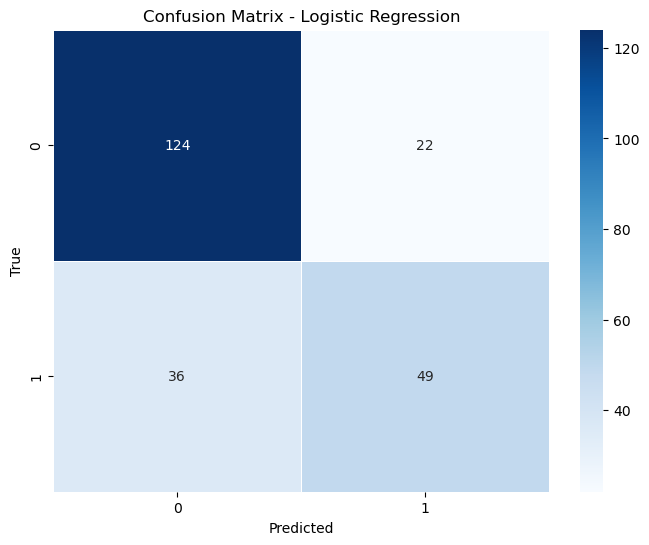

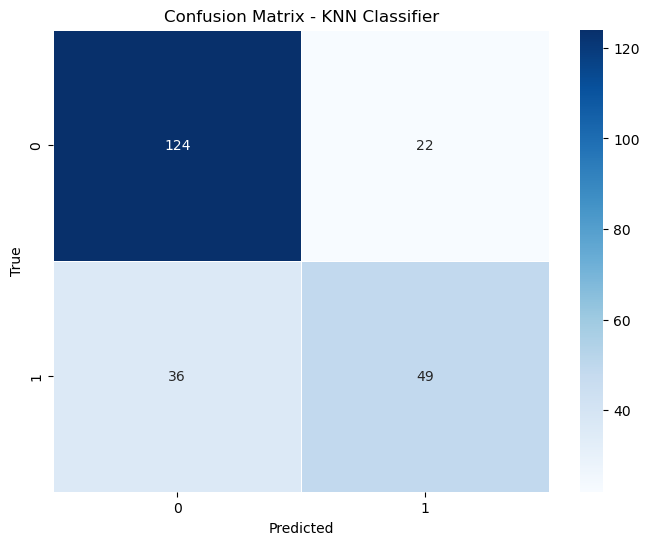

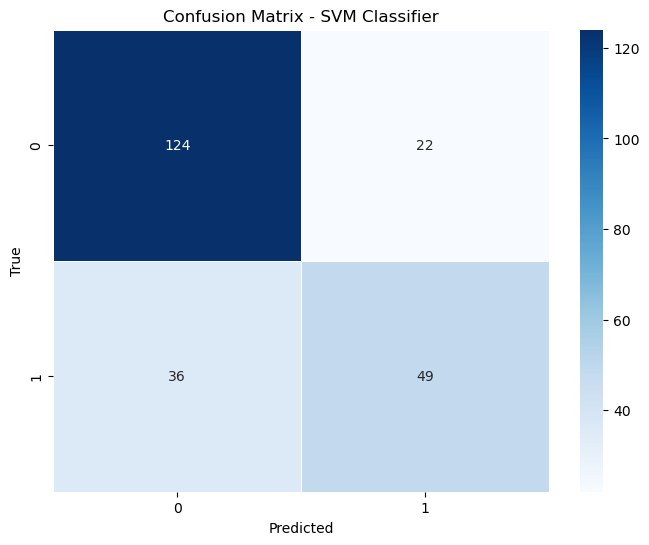

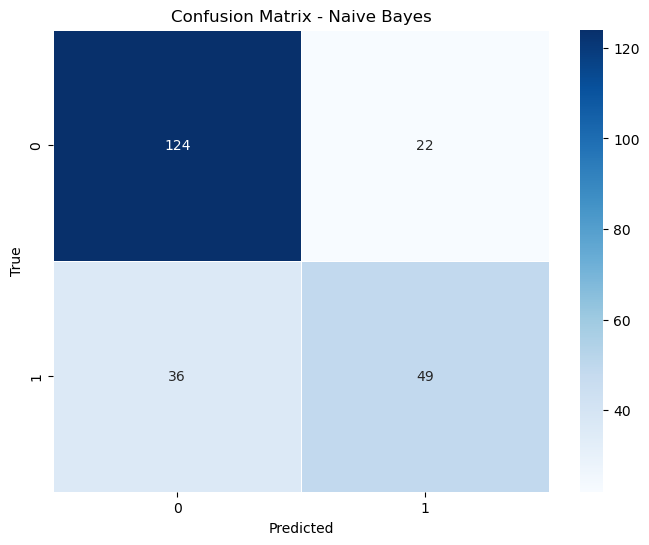

In [57]:
confusion_matrices = {} 

for model_name, model in models.items():
    
    X_test_selected = selector.transform(X_test)
    y_pred_test = best_model.predict(X_test_selected)

    # Calculating the confusion matrix for current model
    cm = confusion_matrix(y_test, y_pred_test)
    confusion_matrices[model_name] = cm

    # Displaying the confusion matrix for the current model
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()



In [15]:

print("Evaluation Metrics - Training Set:")
for model_name in models.keys():
    print(f"{model_name}:")
    print(f"Accuracy: {results_train[model_name]['Accuracy']}")
    print(f"Precision: {results_train[model_name]['Precision']}")
    print(f"Recall: {results_train[model_name]['Recall']}")
    print(f"F1 Score: {results_train[model_name]['F1 Score']}")
    print(f"ROC AUC: {results_train[model_name]['ROC AUC']}")
    
print("Evaluation Metrics - Test Set:")
for model_name in models.keys():
    print(f"{model_name}:")
    print(f"Accuracy: {results_test[model_name]['Accuracy']}")
    print(f"Precision: {results_test[model_name]['Precision']}")
    print(f"Recall: {results_test[model_name]['Recall']}")
    print(f"F1 Score: {results_test[model_name]['F1 Score']}")
    print(f"ROC AUC: {results_test[model_name]['ROC AUC']}")
  

Evaluation Metrics - Training Set:
Logistic Regression:
Accuracy: 0.7838983050847458
Precision: 0.7851018134901873
Recall: 0.7838983050847458
F1 Score: 0.783670005092514
ROC AUC: 0.8424622554183026
KNN Classifier:
Accuracy: 0.7457627118644068
Precision: 0.7496190630572216
Recall: 0.7457627118644068
F1 Score: 0.7447769802614715
ROC AUC: 0.8092542053688276
SVM Classifier:
Accuracy: 0.7528248587570622
Precision: 0.75561732030626
Recall: 0.7528248587570622
F1 Score: 0.7521479510697247
ROC AUC: 0.8116242139870408
Naive Bayes:
Accuracy: 0.6977401129943502
Precision: 0.6980498721227621
Recall: 0.6977401129943502
F1 Score: 0.6976218796650354
ROC AUC: 0.7789109132114016
Evaluation Metrics - Test Set:
Logistic Regression:
Accuracy: 0.7922077922077922
Precision: 0.8033801215619397
Recall: 0.7922077922077922
F1 Score: 0.7948807526536648
ROC AUC: 0.8688154713940371
KNN Classifier:
Accuracy: 0.7575757575757576
Precision: 0.7716079300237716
Recall: 0.7575757575757576
F1 Score: 0.7609758170767988
ROC 

In [22]:
# As observed,the evaluation metrics exhibit relatively high values for both the training and test datasets across all models and the overfitting gap is minimal for all models, we can confidently conclude that significant underfitting(high bias-low variance) and overfitting(low bias-high variance) conditions have been effectively avoided for all the models.

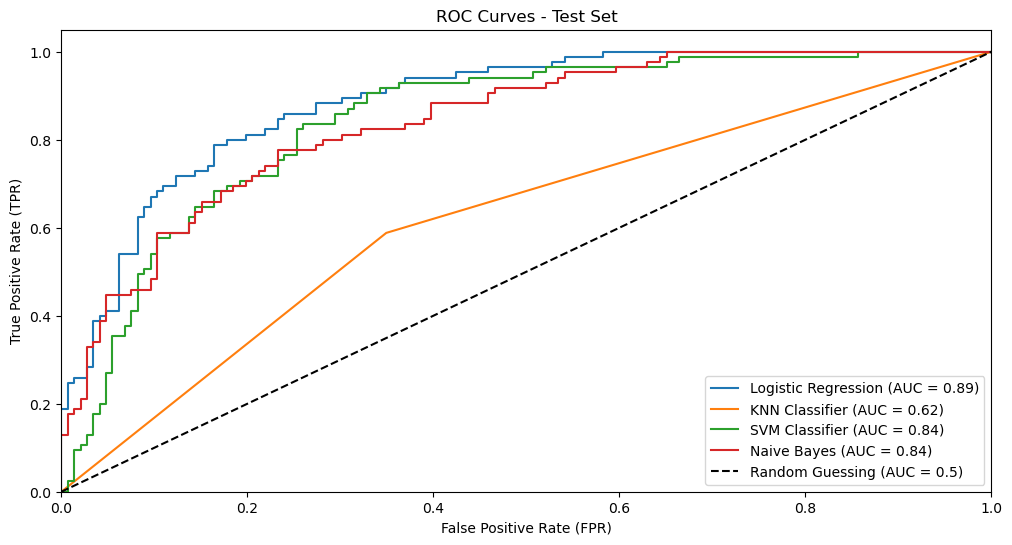

In [20]:
# Plotting ROC AUC curves for all models

plt.figure(figsize=(12, 6))
roc_auc_values_test = {}

for model_name, model in models.items():
    
    selector = feature_selection_methods[model_name]
    X_train_selected = selector.fit_transform(X_train, y_train)
    
    
    if model_name in param_grids:
        param_grid = param_grids[model_name]
        grid_search = GridSearchCV(model, param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1), scoring='accuracy')
        grid_search.fit(X_train_selected, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = model
        best_model.fit(X_train_selected, y_train) 
    
    
    X_test_selected = selector.transform(X_test)

   
    y_scores_test = best_model.predict_proba(X_test_selected)
    
    #Calculating the False Positive Rate (FPR), True Positive Rate (TPR), and corresponding thresholds for the ROC curve using the test data and predicted probabilities from the best model
    fpr, tpr, thresholds = roc_curve(y_test, y_scores_test[:, 1]) 
   
    
    #Calculating the AUC for the ROC curve using the FPR and TPR values
    roc_auc = auc(fpr, tpr)
    roc_auc_values_test[model_name] = roc_auc

    
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc})')


plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.5)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves - Test Set')
plt.legend(loc='lower right')
plt.show()



In [24]:
# From the ROC-AUC curve above,we can can evaluate the general discriminative power of the different models through roc_auc values.It is observed that logistic regression has the highest roc_auc value for the test set thus 

In [25]:
# Given the domain we are working in is healthcare and the business problem we are solving is related to the prediction of diabetes disease,we are constrained to maximize Recall(TPR) ie minimizing false negatives while the trade off with false positives(FPR) can be accepted as the its consequences are less critical when compared to the former 

# We will find optimal threshold probabilities for all the models for test set while assuming a desired FPR of maximum 50% to ensure we can maximize Recall(TPR) as our primary goal.

# Industry and domain-specific guidelines regarding the desired maximum False Positive Rate (FPR) can vary significantly from the assumption made here.

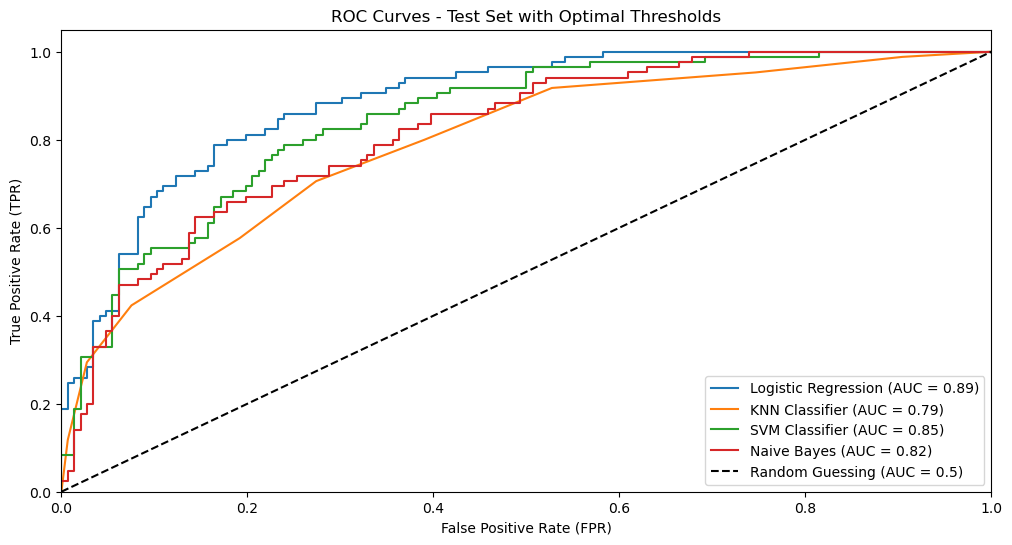

Optimal Thresholds for Desired FPR (50%):
Logistic Regression: 0.20111506592127873 (TPR at FPR 50.0% = 0.9647058823529412)
KNN Classifier: 1.0 (TPR at FPR 50.0% = 0.6705882352941176)
SVM Classifier: 0.35017987969472736 (TPR at FPR 50.0% = 0.9411764705882353)
Naive Bayes: 0.24712024565983473 (TPR at FPR 50.0% = 0.9176470588235294)


In [21]:
#Assuming the maximum desired fpr to be 50%
desired_fpr = 0.5
optimal_thresholds = {}
tpr_at_desired_fpr = {}

# Iterate through models to find optimal thresholds
for model_name, model in models.items():
    selector = feature_selection_methods[model_name]
    X_train_selected = selector.fit_transform(X_train, y_train)
    
    if model_name in param_grids:
        param_grid = param_grids[model_name]
        grid_search = GridSearchCV(model, param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy')
        grid_search.fit(X_train_selected, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = model
        best_model.fit(X_train_selected, y_train) 
    
    
    X_test_selected = selector.transform(X_test)

    # Calculate ROC curve for the test set
    y_scores_test = best_model.predict_proba(X_test_selected)
    fpr, tpr, thresholds = roc_curve(y_test, y_scores_test[:, 1])  
    
    # Find the threshold that achieves the desired FPR level
    fpr_diff = np.abs(fpr - desired_fpr)
    closest_idx = np.argmin(fpr_diff)
    optimal_threshold = thresholds[closest_idx]
    
    # Store the optimal threshold and TPR at desired FPR
    optimal_thresholds[model_name] = optimal_threshold
    tpr_at_desired_fpr[model_name] = tpr[closest_idx]

# Plotting ROC AUC curve for all models using the selected optimal threshold
plt.figure(figsize=(12, 6))

for model_name, model in models.items():
    
    selector = feature_selection_methods[model_name]
    X_train_selected = selector.fit_transform(X_train, y_train)
    
    if model_name in param_grids:
        param_grid = param_grids[model_name]
        grid_search = GridSearchCV(model, param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy')
        grid_search.fit(X_train_selected, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = model
        best_model.fit(X_train_selected, y_train) 
     
    X_test_selected = selector.transform(X_test)

    # Making predictions using the selected optimal threshold
    y_pred_prob = best_model.predict_proba(X_test_selected)
    # Converting predicted probabilities to binary predictions based on condition for assigning postive class.The boolean result of the condition is converted to its corresponding integer value
    y_pred = (y_pred_prob[:, 1] >= optimal_thresholds[model_name]).astype(int).
    
    # Calculating ROC curve for the test set
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])
    
    # Calculate ROC AUC for the test set using the selected threshold
    roc_auc = auc(fpr, tpr)
    
    # Plotting ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc})')


plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.5)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves - Test Set with Optimal Thresholds')
plt.legend(loc='lower right')
plt.show()

# Print the optimal thresholds and corresponding TPR values
print("Optimal Thresholds for Desired FPR (50%):")
for model_name in models.keys():
    print(f"{model_name}: {optimal_thresholds[model_name]} (TPR at FPR {desired_fpr*100}% = {tpr_at_desired_fpr[model_name]})")





In [27]:
# The performance of the models at their respective optimal thresholds is evaluated to determine which threshold maximizes the chosen performance metric for each model.

# We can conclude from the results that for Logistic Regression the chosen performance metric-recall(tpr) is maximized at 96.47% and the corresponding optimal threshold probability is 0.2011.

# Therefore we can choose Logistic Regression for solving our business problem ie. diabetes prediction.

In [28]:
# To further improve performance,we can collect sufficiently more data in conjunction with using more robust models which use ensemble methods and feedforward neural networks which are conventionally used for regression and classifcation tasks on tabular data
# log,square root or box-cox transformations can be applied on the skewed features to mitigate the effect of outliers on the distribution and reduce skewness(approach normality) for respective features
# The performance of the chosen model can differ post deployment in a real world environment

